Muwei is working on this part of project. Last updated 11.11

## 1.What kind of jobs can get the highest salary in the current days?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import seaborn as sns
from scipy import stats

In [2]:
eng_data=pd.read_csv('Scraper/engineering-jobs-job-results.csv')
fn_data=pd.read_csv('Scraper/finance-jobs-job-results.csv')
int_data=pd.read_csv('Scraper/intern-jobs-job-results.csv')
it_data=pd.read_csv('Scraper/it-jobs-job-results.csv')
mk_data=pd.read_csv('Scraper/marketing-jobs-job-results.csv')

In [3]:
eng_data.head()

,Name,Company,State,City,Salary,Location,Url
0,Product Engineer I,AeroVironment,CA,Simi Valley,$69k-$95k,"Simi Valley, CA",https://www.glassdoor.com/partner/jobListing.h...
1,Software Engineer - University Graduate,PayPal,CA,San Jose,$109k-$156k,"San Jose, CA",https://www.glassdoor.com/partner/jobListing.h...
2,Project Engineer,"LangCo NW, Inc.",WA,Oak Harbor,NaN,"Oak Harbor, WA",https://www.glassdoor.com/partner/jobListing.h...
3,Head of Engineering,Jovio,TX,Austin,$120k-$150k,"Austin, TX",https://www.glassdoor.com/partner/jobListing.h...
4,Senior Hardware Engineer,Scale Computing,IN,Indianapolis,NaN,"Indianapolis, IN",https://www.glassdoor.com/partner/jobListing.h...


In [4]:
# compute average salary of each category of job
def average_salary_of_category(job_data):
    '''
    for all non-0 input
    compute average
    '''
    salary = []
    for s in job_data['Salary']:
        if type(s)==str:
            r = re.findall(r'[^\,$*"/:?\\k|<>]', s, re.S)
            r = "".join(r).strip().split('-')    
            #print(r)
            r[0] = int(r[0])
            r[1] = int(r[1]) 
            salary.append(r)
    df = pd.DataFrame(data=salary)
    #aver = df.sum()/len(df)
    return df

In [5]:
# Data frame of low / high salary
ave_eng = (average_salary_of_category(eng_data))
ave_fn  = (average_salary_of_category(fn_data))
ave_it  = (average_salary_of_category(it_data))
ave_mk  = (average_salary_of_category(mk_data))

In [6]:
# low / high average
salary_eng = ave_eng.sum()/len(ave_eng)
salary_fn  = ave_fn.sum()/len(ave_fn)
salary_it  = ave_it.sum()/len(ave_it)
salary_mk  = ave_mk.sum()/len(ave_mk)

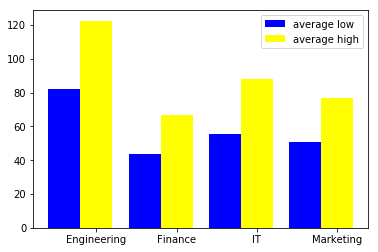

In [7]:
name_list = ['Engineering','Finance','IT','Marketing']
num_list1 = [salary_eng[0],salary_fn[0],salary_it[0],salary_mk[0]]
num_list2 = [salary_eng[1],salary_fn[1],salary_it[1],salary_mk[1]]
x =list(range(len(num_list1)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average low', color = 'blue')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average high', tick_label = name_list, color = 'yellow')
plt.legend()
plt.show()

### The distribution of salary in each category

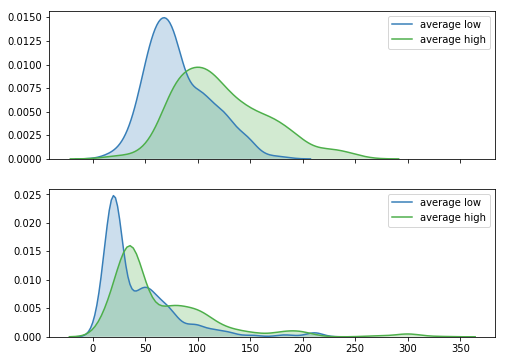

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_eng[0], label = 'average low', shade=True, color=c2, ax=ax1)
sns.kdeplot(ave_eng[1], label = 'average high',shade=True, color=c3, ax=ax1)
sns.kdeplot(ave_fn[0], label = 'average low', shade=True, color=c2, ax=ax2)
sns.kdeplot(ave_fn[1], label = 'average high',shade=True, color=c3, ax=ax2)
#sns.kdeplot(ave_it[0], label = 'average low', shade=True, color=c1, ax=ax3)
#sns.kdeplot(ave_it[1], label = 'average high',shade=True, color=c2, ax=ax3)
#sns.kdeplot(ave_mk[0], label = 'average low', shade=True, color=c1, ax=ax4)
#sns.kdeplot(ave_mk[1], label = 'average high',shade=True, color=c2, ax=ax4)

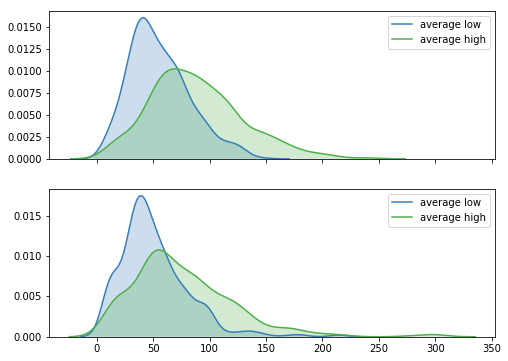

In [9]:
f, (ax3, ax4) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_it[0], label = 'average low', shade=True, color=c2, ax=ax3)
sns.kdeplot(ave_it[1], label = 'average high',shade=True, color=c3, ax=ax3)
sns.kdeplot(ave_mk[0], label = 'average low', shade=True, color=c2, ax=ax4)
sns.kdeplot(ave_mk[1], label = 'average high',shade=True, color=c3, ax=ax4)

## 2.What is the distribution of job opportunities among different categories?

In [10]:
def most_frequent_words(job_data):
    job_name = []
    punctuation = '!.,;:?"\/#&+-'
    for name in job_data['Name']:
        name = re.sub(r'[{}]+'.format(punctuation),'',name)
        #name = "".join(name)
        o = (name.replace("  ", " ").lower().split(" "))
        for word in o:
            job_name.append(word)


    word_seq = {}
    for word in job_name:
        if word not in word_seq:
            word_seq[word] = 1
        else:
            word_seq[word] += 1
    ret = sorted(word_seq.items(),key = lambda x:x[1],reverse = True)[:25]
    return ret

In [11]:
most_frequent_words(eng_data)

[('engineer', 912),
 ('senior', 313),
 ('software', 295),
 ('sr', 93),
 ('project', 50),
 ('principal', 46),
 ('design', 45),
 ('staff', 43),
 ('and', 40),
 ('network', 39),
 ('sales', 38),
 ('ii', 37),
 ('systems', 33),
 ('development', 32),
 ('mechanical', 30),
 ('for', 30),
 ('test', 29),
 ('applications', 28),
 ('devops', 24),
 ('security', 22),
 ('reliability', 22),
 ('front', 22),
 ('end', 22),
 ('civil', 21),
 ('site', 21)]

In [12]:
most_frequent_words(fn_data)

[('rn', 206),
 ('manager', 134),
 ('finance', 131),
 ('center', 124),
 ('medical', 110),
 ('care', 108),
 ('room', 68),
 ('santa', 64),
 ('fe', 61),
 ('senior', 53),
 ('prn', 53),
 ('analyst', 52),
 ('sales', 49),
 ('emergency', 48),
 ('nurse', 47),
 ('family', 46),
 ('rust', 41),
 ('urgent', 39),
 ('progressive', 36),
 ('adult', 35),
 ('health', 33),
 ('and', 32),
 ('clinic', 31),
 ('md', 31),
 ('parts', 30)]

In [13]:
most_frequent_words(it_data)

[('it', 519),
 ('support', 176),
 ('specialist', 150),
 ('engineer', 145),
 ('manager', 139),
 ('systems', 102),
 ('analyst', 88),
 ('senior', 88),
 ('administrator', 71),
 ('project', 56),
 ('network', 52),
 ('business', 43),
 ('technician', 42),
 ('security', 41),
 ('technical', 38),
 ('system', 37),
 ('information', 36),
 ('sr', 35),
 ('technology', 34),
 ('desk', 33),
 ('application', 31),
 ('and', 30),
 ('i', 28),
 ('services', 27),
 ('director', 27)]

In [14]:
most_frequent_words(mk_data)

[('marketing', 547),
 ('manager', 237),
 ('sales', 220),
 ('and', 92),
 ('director', 91),
 ('specialist', 78),
 ('representative', 77),
 ('coordinator', 58),
 ('associate', 58),
 ('senior', 54),
 ('digital', 52),
 ('of', 51),
 ('product', 42),
 ('account', 37),
 ('assistant', 31),
 ('executive', 28),
 ('development', 27),
 ('customer', 25),
 ('sr', 25),
 ('consultant', 21),
 ('lead', 21),
 ('software', 20),
 ('outside', 19),
 ('engineer', 19),
 ('business', 18)]